Imports:

In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

#Read the dataset:

In [2]:
df=pd.read_csv("Tata.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


#Analyze the closing prices from dataframe:

In [3]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

In [4]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2018-10-08,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
2018-10-05,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


Plotting the data as per the Close value

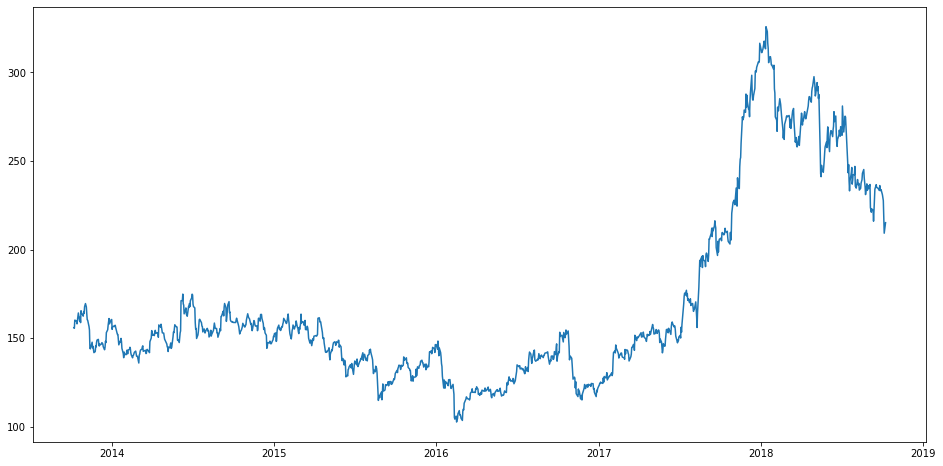

In [5]:
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [6]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

Sort the dataset on date time and filter “Date” and “Close” columns:

In [7]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

In [8]:
new_dataset

,Date,Close
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
1230,NaN,NaN
1231,NaN,NaN
1232,NaN,NaN
1233,NaN,NaN


In [9]:
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]
    

In [10]:
new_dataset

,Date,Close
0,2013-10-08 00:00:00,155.8
1,2013-10-09 00:00:00,155.55
2,2013-10-10 00:00:00,160.15
3,2013-10-11 00:00:00,160.05
4,2013-10-14 00:00:00,159.45
...,...,...
1230,2018-10-01 00:00:00,230.9
1231,2018-10-03 00:00:00,227.6
1232,2018-10-04 00:00:00,218.2
1233,2018-10-05 00:00:00,209.2


In [11]:
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)

In [12]:
new_dataset

,Close
Date,
2013-10-08,155.8
2013-10-09,155.55
2013-10-10,160.15
2013-10-11,160.05
2013-10-14,159.45
...,...
2018-10-01,230.9
2018-10-03,227.6
2018-10-04,218.2


In [13]:
final_dataset=new_dataset.values

In [14]:
final_dataset

array([[155.8],
       [155.55],
       [160.15],
       ...,
       [218.2],
       [209.2],
       [215.15]], dtype=object)

In [15]:
final_dataset.size

1235

In [16]:
train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

Normalize the new filtered dataset:

In [17]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

In [18]:
scaled_data

array([[0.23823398],
       [0.2371134 ],
       [0.25773196],
       ...,
       [0.51792918],
       [0.47758853],
       [0.50425818]])

In [19]:
x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [20]:
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

Build and train the LSTM model:

In [21]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

In [22]:
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

927/927 - 22s - loss: 0.0012


Take a sample of a dataset to make stock price predictions using the LSTM model:

In [23]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [24]:
predicted_closing_price

array([[195.20778],
       [196.33713],
       [197.1039 ],
       [197.69044],
       [198.47815],
       [198.93811],
       [199.0568 ],
       [199.08083],
       [198.48306],
       [197.33444],
       [195.8595 ],
       [195.48553],
       [195.02463],
       [195.35103],
       [197.69759],
       [201.6836 ],
       [205.89761],
       [209.68504],
       [212.35126],
       [213.7889 ],
       [215.8698 ],
       [216.2038 ],
       [215.5723 ],
       [217.1622 ],
       [218.76027],
       [219.86894],
       [222.62238],
       [226.35724],
       [230.12868],
       [234.64833],
       [241.3274 ],
       [247.49074],
       [252.48952],
       [256.0825 ],
       [258.95633],
       [260.61432],
       [263.21207],
       [264.26068],
       [265.697  ],
       [266.28806],
       [265.56406],
       [264.51495],
       [262.54453],
       [262.184  ],
       [263.40283],
       [267.02563],
       [269.18472],
       [269.7936 ],
       [269.51038],
       [269.27322],


In [29]:
import warnings
warnings.filterwarnings('ignore')

Save the LSTM model:

In [30]:
lstm_model.save("saved_model.h5")

Visualize the predicted stock costs with actual stock costs:

In [31]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]

In [32]:
valid_data['Predictions']=predicted_closing_price


In [33]:
valid_data

,Close,Predictions
Date,,
2017-10-09,208.3,195.207779
2017-10-10,208.45,196.337128
2017-10-11,209.4,197.103897
2017-10-12,212,197.690445
2017-10-13,210.25,198.478149
...,...,...
2018-10-01,230.9,221.434677
2018-10-03,227.6,220.432739
2018-10-04,218.2,218.831573


Final Ploting 

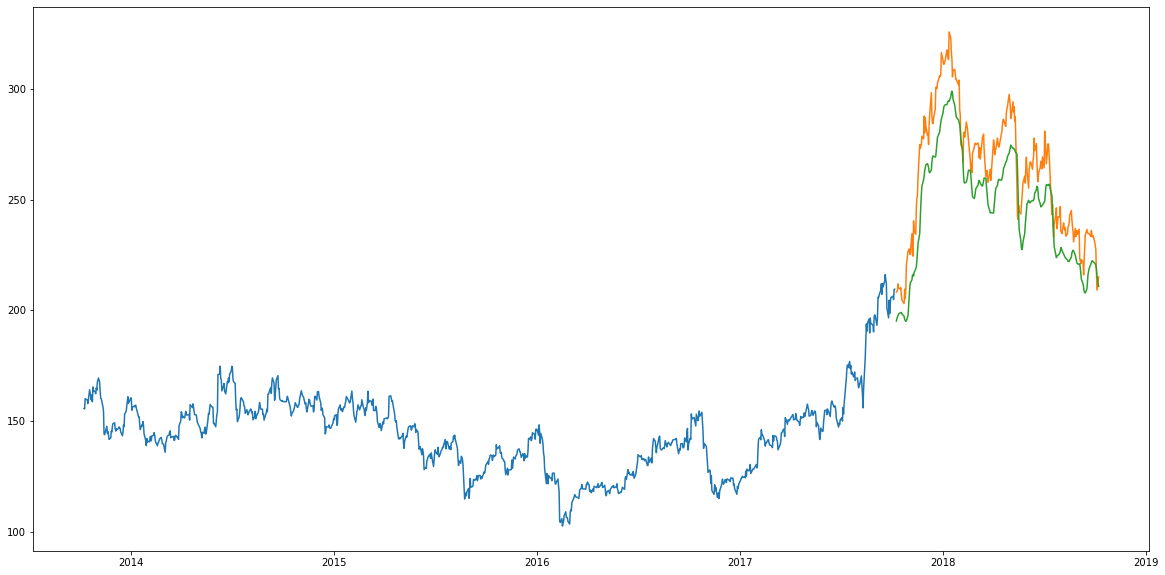

In [34]:
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])